# GeoPandas - Tipi di mappe
In questo NoteBook verrà mostrato come è possibile utilizzare la libreria [contextily](https://contextily.readthedocs.io/en/latest/index.html) per sovrapporre ad i grafici altri tipi di mappe, come mappe riprese da satelliti o mappe stradali.

#### **contextily**
*contextily* è un pacchetto Python per recuperare pezzi di mappa da Internet. Può aggiungere riquadri come mappa di base alle figure matplotlib o scrivere mappe su file raster geospaziali. I riquadri di delimitazione possono essere passati sia in WGS84 (EPSG:4326) che in Spheric Mercator (EPSG:3857).

In [ ]:
!pip install geopandas contextily

In [2]:
import geopandas as gpd
import contextily as cx
import matplotlib.pyplot as plt

*contextily* basa le sue mappe anche su provider di terzi, di conseguenza è possibile creare ulteriori mappe tramite essi.<br>
E' possibile applicare la mappa del provider alla crearezione della cartina con il parametro `source` e come valore la mappa del provider

In [3]:
cx.providers

{'AzureMaps': {'MicrosoftBaseDarkGrey': {'apiVersion': '2.0',
   'attribution': 'See https://docs.microsoft.com/en-US/rest/api/maps/renderv2/getmaptilepreview for details.',
   'html_attribution': 'See https://docs.microsoft.com/en-US/rest/api/maps/renderv2/getmaptilepreview for details.',
   'language': 'en-US',
   'name': 'AzureMaps.MicrosoftBaseDarkGrey',
   'subscriptionKey': '<insert your subscription key here>',
   'url': 'https://atlas.microsoft.com/map/tile?api-version={apiVersion}&tilesetId={variant}&x={x}&y={y}&zoom={z}&language={language}&subscription-key={subscriptionKey}',
   'variant': 'microsoft.base.darkgrey'},
  'MicrosoftBaseHybridRoad': {'apiVersion': '2.0',
   'attribution': 'See https://docs.microsoft.com/en-US/rest/api/maps/renderv2/getmaptilepreview for details.',
   'html_attribution': 'See https://docs.microsoft.com/en-US/rest/api/maps/renderv2/getmaptilepreview for details.',
   'language': 'en-US',
   'name': 'AzureMaps.MicrosoftBaseHybridRoad',
   'subscriptionKey': '<insert your subscription key here>',
   'url': 'https://atlas.microsoft.com/map/tile?api-version={apiVersion}&tilesetId={variant}&x={x}&y={y}&zoom={z}&language={language}&subscription-key={subscriptionKey}',
   'variant': 'microsoft.base.hybrid.road'},
  'MicrosoftBaseRoad': {'apiVersion': '2.0',
   'attribution': 'See https://docs.microsoft.com/en-US/rest/api/maps/renderv2/getmaptilepreview for details.',
   'html_attribution': 'See https://docs.microsoft.com/en-US/rest/api/maps/renderv2/getmaptilepreview for details.',
   'language': 'en-US',
   'name': 'AzureMaps.MicrosoftBaseRoad',
   'subscriptionKey': '<insert your subscription key here>',
   'url': 'https://atlas.microsoft.com/map/tile?api-version={apiVersion}&tilesetId={variant}&x={x}&y={y}&zoom={z}&language={language}&subscription-key={subscriptionKey}',
   'variant': 'microsoft.base.road'},
  'MicrosoftImagery': {'apiVersion': '2.0',
   'attribution': 'See https://docs.microsoft.com/en-US/rest/api/maps/renderv2/getmaptilepreview for details.',
   'html_attribution': 'See https://docs.microsoft.com/en-US/rest/api/maps/renderv2/getmaptilepreview for details.',
   'language': 'en-US',
   'name': 'AzureMaps.MicrosoftImagery',
   'subscriptionKey': '<insert your subscription key here>',
   'url': 'https://atlas.microsoft.com/map/tile?api-version={apiVersion}&tilesetId={variant}&x={x}&y={y}&zoom={z}&language={language}&subscription-key={subscriptionKey}',
   'variant': 'microsoft.imagery'},
  'MicrosoftTerraMain': {'apiVersion': '2.0',
   'attribution': 'See https://docs.microsoft.com/en-US/rest/api/maps/renderv2/getmaptilepreview for details.',
   'html_attribution': 'See https://docs.microsoft.com/en-US/rest/api/maps/renderv2/getmaptilepreview for details.',
   'language': 'en-US',
   'name': 'AzureMaps.MicrosoftTerraMain',
   'subscriptionKey': '<insert your subscription key here>',
   'url': 'https://atlas.microsoft.com/map/tile?api-version={apiVersion}&tilesetId={variant}&x={x}&y={y}&zoom={z}&language={language}&subscription-key={subscriptionKey}',
   'variant': 'microsoft.terra.main'},
  'MicrosoftWeatherInfraredMain': {'apiVersion': '2.0',
   'attribution': 'See https://docs.microsoft.com/en-US/rest/api/maps/renderv2/getmaptilepreview#uri-parameters for details.',
   'html_attribution': 'See https://docs.microsoft.com/en-US/rest/api/maps/renderv2/getmaptilepreview#uri-parameters for details.',
   'language': 'en-US',
   'name': 'AzureMaps.MicrosoftWeatherInfraredMain',
   'subscriptionKey': '<insert your subscription key here>',
   'timeStamp': '2021-05-08T09:03:00Z',
   'url': 'https://atlas.microsoft.com/map/tile?api-version={apiVersion}&tilesetId={variant}&x={x}&y={y}&zoom={z}&timeStamp={timeStamp}&language={language}&subscription-key={subscriptionKey}',
   'variant': 'microsoft.weather.infrared.main'},
  'MicrosoftWeatherRadarMain': {'apiVersion': '2.0',
   'attribution': 'See https://docs.microsoft.com/en-US/rest/api/maps/renderv2/getmaptilepreview#uri-parameters for de

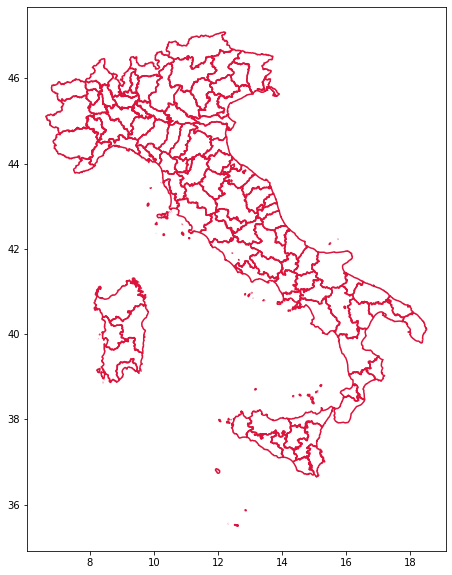

In [15]:
# Mappa della suddivisione in province dell'Italia
italy = gpd.read_file('https://raw.githubusercontent.com/CappuCitti/Python-appunti-ed-esercizi/main/GeoPandas/Data/ItalyProvinces_EPSG-3395.geojson').to_crs('EPSG:4326')
italy.boundary.plot(figsize=(20,10), color='crimson')

In [20]:
# Mappa di base di contextily
ax = italy.boundary.plot(figsize=(20,10), color='crimson', alpha=0.5)
cx.add_basemap(ax, crs=italy.crs)

### Altri esempi di mappe fisiche, politiche e tematiche

In [6]:
# Carta fisica
ax = italy.boundary.plot(figsize=(20,10), color='crimson', alpha=0.5)
cx.add_basemap(ax, crs=italy.crs, source=cx.providers.Stamen.TerrainBackground)

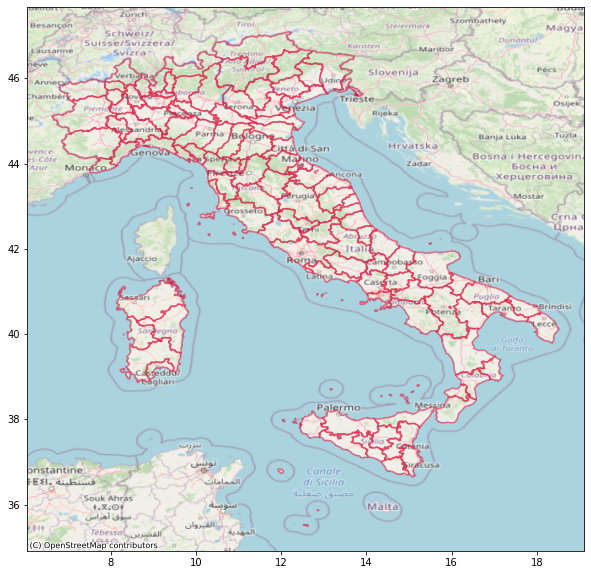

In [7]:
# Carta politica
ax = italy.boundary.plot(figsize=(20,10), color='crimson', alpha=0.5)
cx.add_basemap(ax, crs=italy.crs, source=cx.providers.OpenStreetMap.Mapnik)

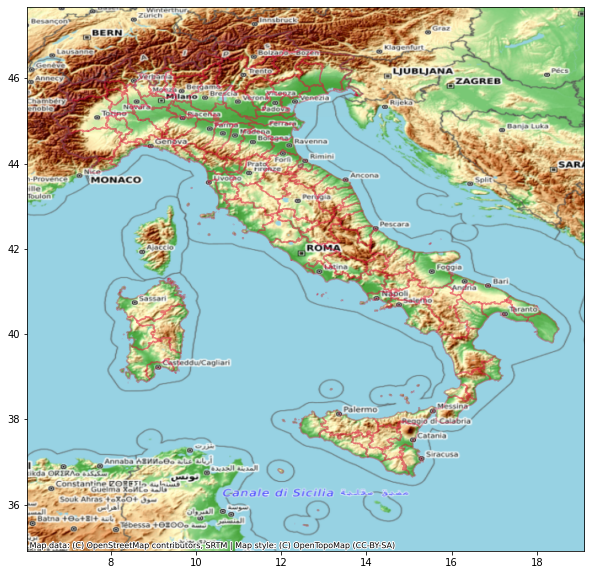

In [8]:
# Carta topografica
ax = italy.boundary.plot(figsize=(20,10), color='crimson', alpha=0.3)
cx.add_basemap(ax, crs=italy.crs, source=cx.providers.OpenTopoMap)

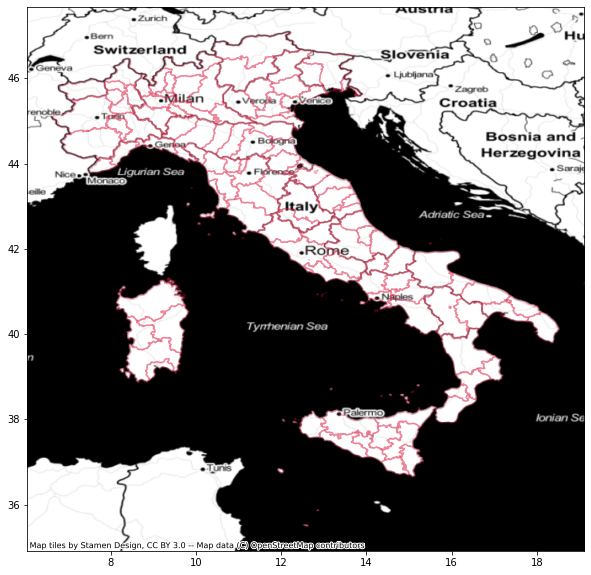

In [9]:
# Carta B/N
ax = italy.boundary.plot(figsize=(20,10), color='crimson', alpha=0.3)
cx.add_basemap(ax, crs=italy.crs, source=cx.providers.Stamen.Toner)

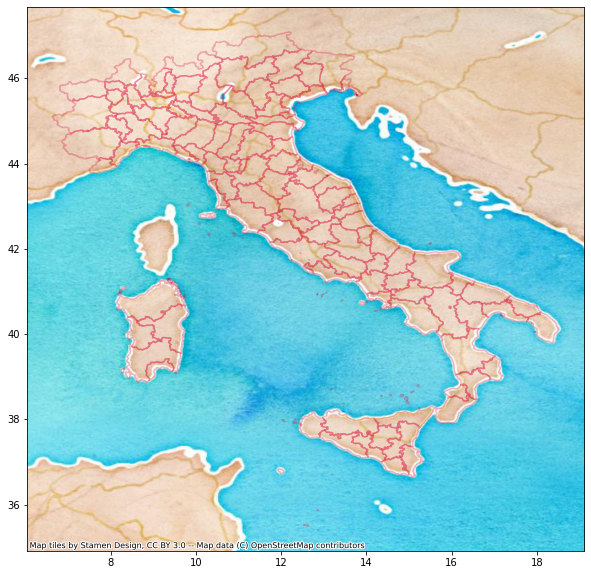

In [11]:
# Carta acquerello
ax = italy.boundary.plot(figsize=(20,10), color='crimson', alpha=0.3)
cx.add_basemap(ax, crs=italy.crs, source=cx.providers.Stamen.Watercolor)

In [22]:
# Inquinamento luminoso
ax = italy.boundary.plot(figsize=(20,10), color='crimson', alpha=0.6)
cx.add_basemap(ax, crs=italy.crs, source=cx.providers.NASAGIBS.ViirsEarthAtNight2012)